In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
train_data_file = "./zhengqi_train.txt"
test_data_file = "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

In [3]:
train_data.describe()


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


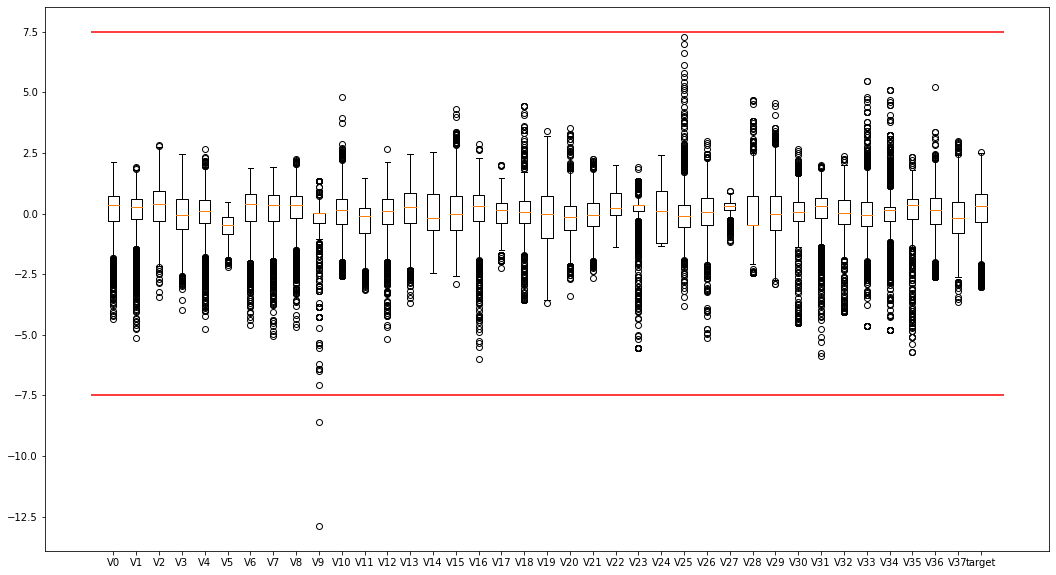

In [4]:
plt.figure(figsize=(18, 10))
plt.boxplot(x=train_data.values, labels=train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
plt.show()

In [5]:
train_data = train_data[train_data['V9']>-7.5]
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.00000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.123725,0.056856,0.290340,-0.068364,0.012254,-0.558971,0.183273,0.116274,0.178138,-0.16213,...,0.097019,0.058619,0.127617,0.023626,0.008271,0.006959,0.198513,0.030099,-0.131957,0.127451
std,0.927984,0.941269,0.911231,0.970357,0.888037,0.517871,0.918211,0.955418,0.895552,0.91089,...,1.060824,0.894311,0.873300,0.896509,1.007175,1.003411,0.985058,0.970258,1.015666,0.983144
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-7.07100,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.292000,-0.224250,-0.310000,-0.652750,-0.385000,-0.853000,-0.310000,-0.295000,-0.158750,-0.39000,...,-0.664000,-0.282000,-0.170750,-0.405000,-0.499000,-0.290000,-0.199750,-0.412750,-0.798750,-0.347500
50%,0.359500,0.273000,0.386000,-0.045000,0.109500,-0.466000,0.388500,0.345000,0.362000,0.04200,...,-0.023000,0.054500,0.299500,0.040000,-0.040000,0.160000,0.364000,0.137000,-0.186000,0.314000
75%,0.726000,0.599000,0.918750,0.623500,0.550000,-0.154000,0.831750,0.782750,0.726000,0.04200,...,0.745000,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.643750,0.493000,0.793750
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.33500,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [6]:
from sklearn import preprocessing 

features_columns = [col for col in train_data.columns if col not in ['target']]

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']

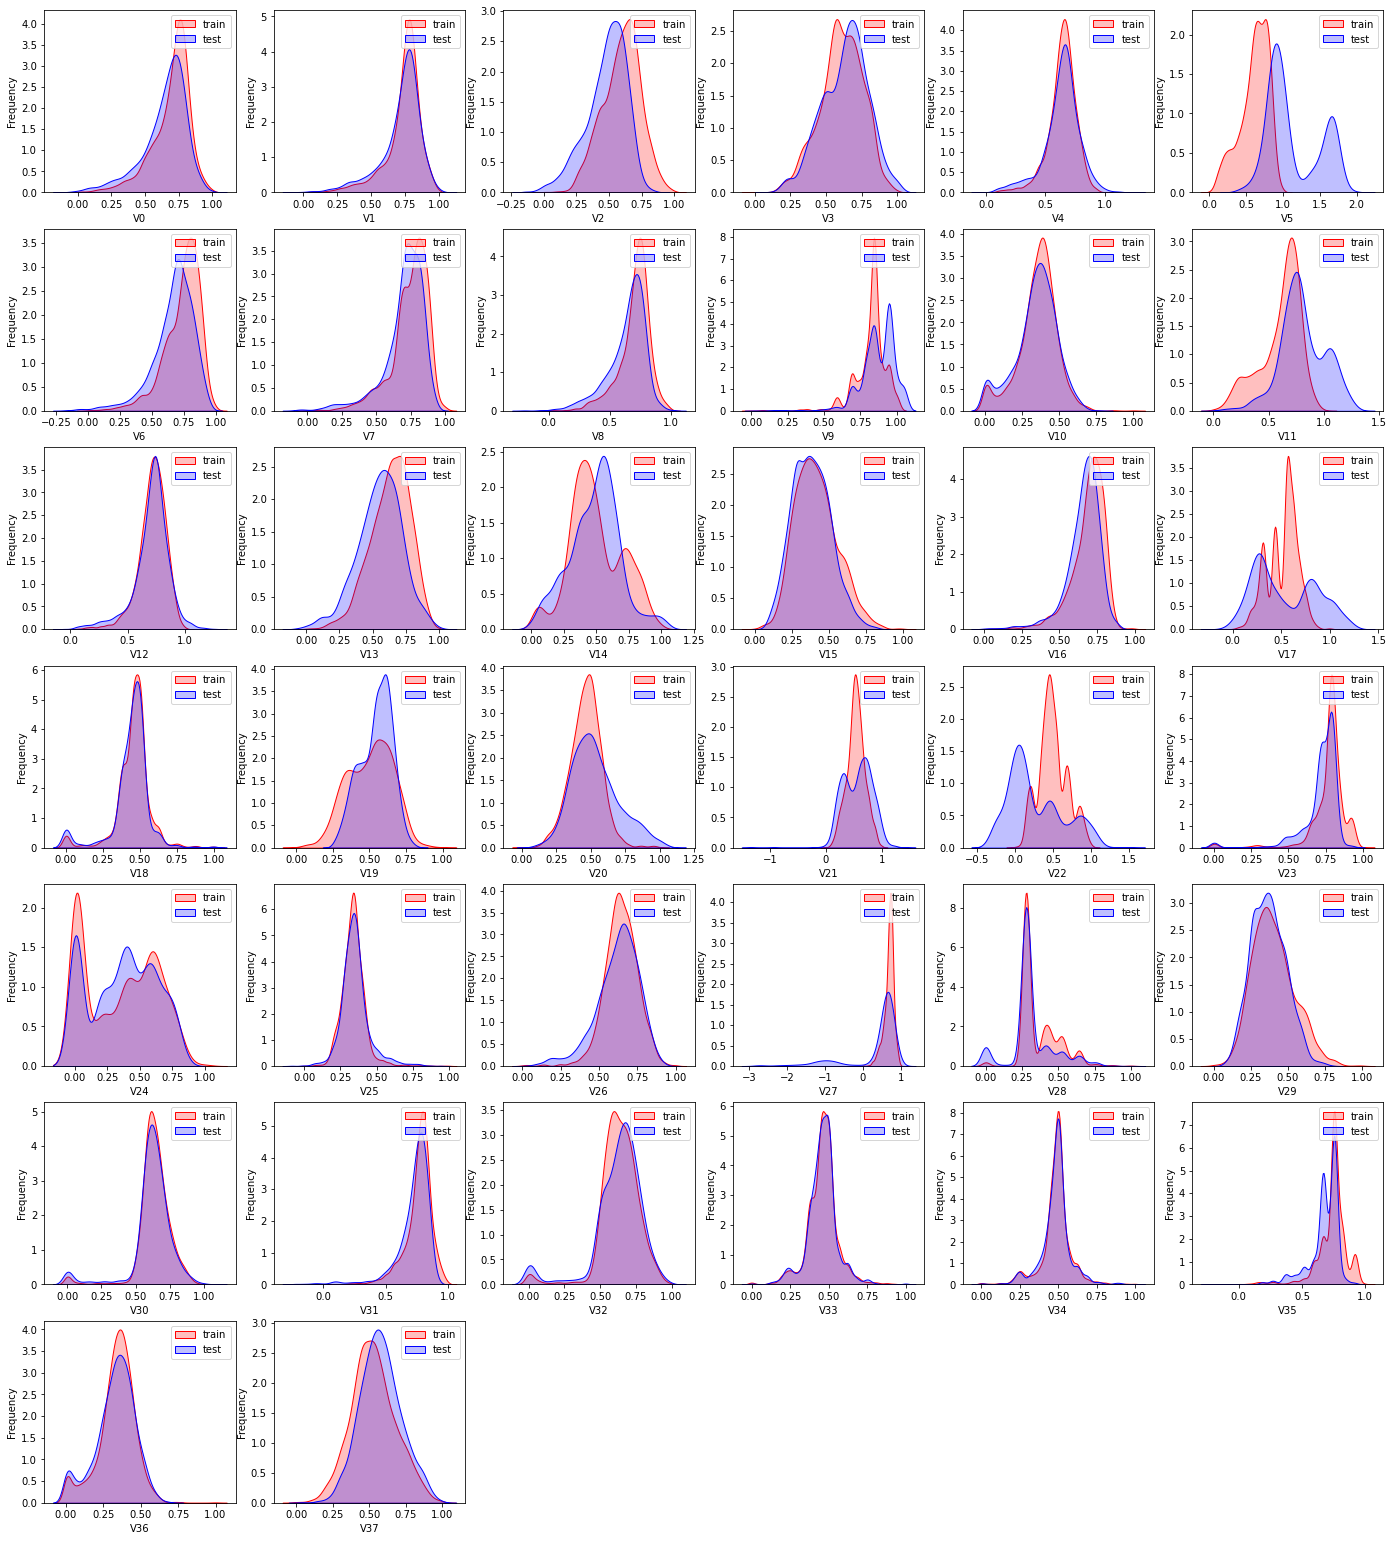

In [7]:
dist_cols = 6
dist_rows = len(test_data_scaler.columns)

plt.figure(figsize=(4*dist_cols,4*dist_rows))


for i, col in enumerate(test_data_scaler.columns):
    ax=plt.subplot(dist_rows,dist_cols,i+1)
    ax = sns.kdeplot(train_data_scaler[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data_scaler[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
 
plt.show()

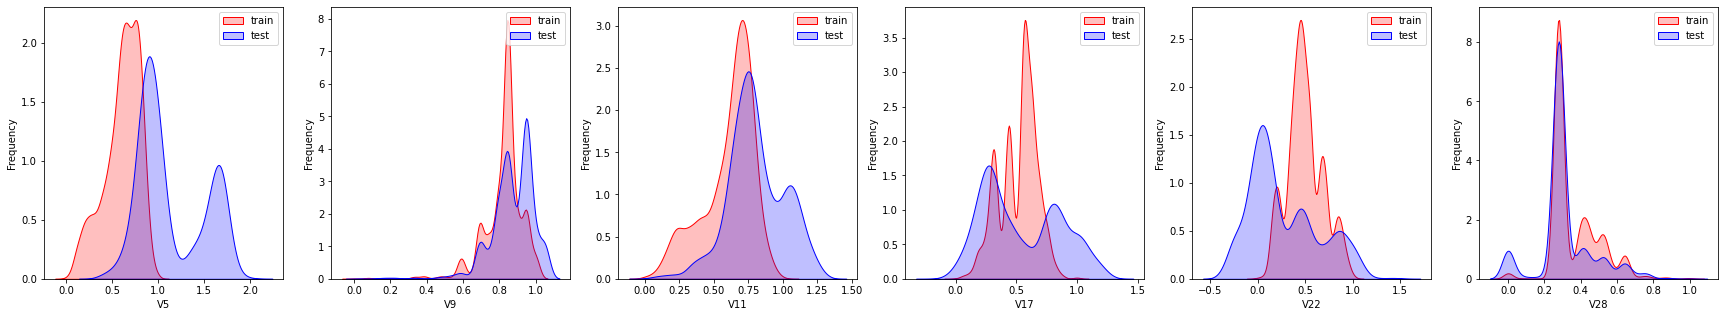

In [8]:
drop_col = 6
drop_row = 1

plt.figure(figsize=(5*drop_col,5*drop_row))

for i, col in enumerate(["V5","V9","V11","V17","V22","V28"]):
    ax =plt.subplot(drop_row,drop_col,i+1)
    ax = sns.kdeplot(train_data_scaler[col], color="Red", shade=True)
    ax= sns.kdeplot(test_data_scaler[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
plt.show()

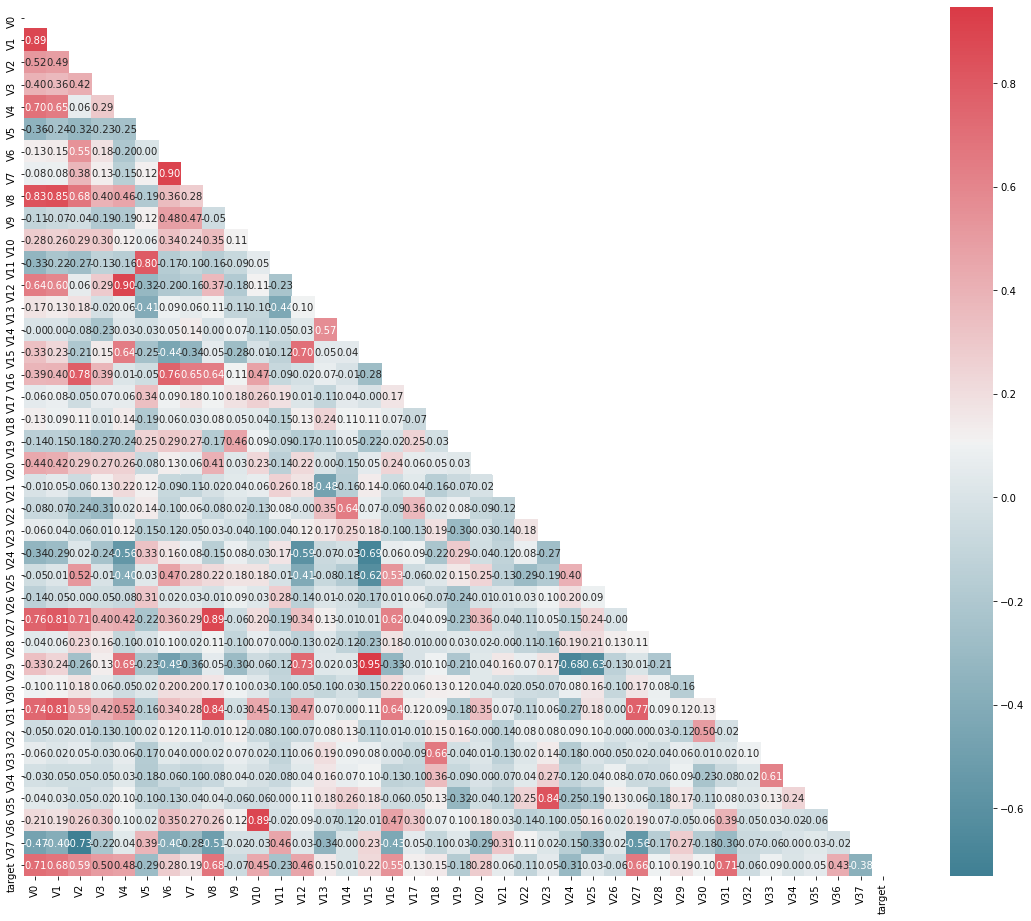

In [9]:
plt.figure(figsize=(20, 16))  
column = train_data_scaler.columns.tolist()  
mcorr = train_data_scaler[column].corr(method="spearman")  
mask = np.zeros_like(mcorr, dtype=np.bool)  
mask[np.triu_indices_from(mask)] = True  
cmap = sns.diverging_palette(220, 10, as_cmap=True)  
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  
plt.show()

In [10]:
mcorr=mcorr.abs()
numerical_corr=mcorr[mcorr['target']>0.1]['target']
print(numerical_corr.sort_values(ascending=False))

index0 = numerical_corr.sort_values(ascending=False).index
print(train_data_scaler[index0].corr('spearman'))

target    1.000000
V0        0.712403
V31       0.711636
V1        0.682909
V8        0.679469
V27       0.657398
V2        0.585850
V16       0.545793
V3        0.501622
V4        0.478683
V12       0.460300
V10       0.448682
V36       0.425991
V37       0.376443
V24       0.305526
V5        0.286076
V6        0.280195
V20       0.278381
V11       0.234551
V15       0.221290
V29       0.190109
V7        0.185321
V19       0.180111
V18       0.149741
V13       0.149199
V17       0.126262
V22       0.112743
V30       0.101378
Name: target, dtype: float64
          target        V0       V31        V1        V8       V27        V2  \
target  1.000000  0.712403  0.711636  0.682909  0.679469  0.657398  0.585850   
V0      0.712403  1.000000  0.739116  0.894116  0.832151  0.763128  0.516817   
V31     0.711636  0.739116  1.000000  0.807585  0.841469  0.765750  0.589890   
V1      0.682909  0.894116  0.807585  1.000000  0.849034  0.807102  0.490239   
V8      0.679469  0.832151  0.841469  0

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #多重共线性方差膨胀因子

#多重共线性
new_numerical=['V0', 'V2', 'V3', 'V4', 'V5', 'V6', 'V10','V11', 
                         'V13', 'V15', 'V16', 'V18', 'V19', 'V20', 'V22','V24','V30', 'V31', 'V37']
X=np.matrix(train_data_scaler[new_numerical])
VIF_list=[variance_inflation_factor(X, i) for i in range(X.shape[1])]
VIF_list

[216.73387180903222,
 114.38118723828812,
 27.863778129686356,
 201.96436579080174,
 78.93722825798903,
 151.06983667656465,
 14.519604941508451,
 82.69750284665385,
 28.479378440614585,
 27.759176471505945,
 526.6483470743831,
 23.501666426383405,
 19.920315849901424,
 24.64048176500875,
 11.816055964845335,
 4.958208708452918,
 37.09877416736591,
 298.26442986612767,
 47.854002539887034]

In [13]:
from sklearn.decomposition import PCA   #主成分分析法

#PCA方法降维
#保持90%的信息
pca = PCA(n_components=0.9)
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_90 = pca.transform(test_data_scaler)
new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)
new_train_pca_90['target'] = train_data_scaler['target']
new_train_pca_90.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2884.000000
mean,9.198723e-17,-9.711566e-17,1.298338e-18,3.516091e-17,6.385898e-17,-3.896937e-17,2.890004e-18,8.086240e-17,-6.151236e-17,8.239636e-17,1.466400e-17,1.136142e-16,-1.397396e-17,-4.453298e-17,5.680228e-19,1.148710e-16,0.127274
std,3.998976e-01,3.500240e-01,2.938631e-01,2.728023e-01,2.077128e-01,1.951842e-01,1.877104e-01,1.607670e-01,1.512707e-01,1.443772e-01,1.368790e-01,1.286192e-01,1.193301e-01,1.149758e-01,1.133507e-01,1.019259e-01,0.983462
min,-1.071795e+00,-9.429479e-01,-9.948314e-01,-7.103087e-01,-7.703987e-01,-5.340294e-01,-5.993766e-01,-5.870755e-01,-6.282818e-01,-4.902583e-01,-6.341045e-01,-5.906753e-01,-4.175153e-01,-4.310613e-01,-4.170535e-01,-3.601627e-01,-3.044000
25%,-2.804085e-01,-2.613727e-01,-2.090797e-01,-1.945196e-01,-1.315620e-01,-1.264097e-01,-1.236360e-01,-1.016452e-01,-9.662098e-02,-9.297088e-02,-8.202809e-02,-7.721868e-02,-7.139961e-02,-7.474073e-02,-7.709743e-02,-6.603914e-02,-0.348500
50%,-1.417104e-02,-1.277241e-02,2.112166e-02,-2.337401e-02,-5.122797e-03,-1.355336e-02,-1.747870e-04,-4.656359e-03,2.572054e-03,-1.479172e-03,7.286444e-03,-5.745946e-03,-4.140670e-03,1.054915e-03,-1.758387e-03,-7.533392e-04,0.313000
75%,2.287306e-01,2.317720e-01,2.069571e-01,1.657590e-01,1.281660e-01,9.993122e-02,1.272081e-01,9.657222e-02,1.002626e-01,9.059634e-02,8.833765e-02,7.148033e-02,6.786199e-02,7.574868e-02,7.116829e-02,6.357449e-02,0.794250
max,1.597730e+00,1.382802e+00,1.010250e+00,1.448007e+00,1.034061e+00,1.358962e+00,6.191589e-01,7.370089e-01,6.449125e-01,5.839586e-01,6.405187e-01,6.780732e-01,5.156118e-01,4.978126e-01,4.673189e-01,4.570870e-01,2.538000


In [14]:
#PCA方法降维
#保留16个主成分
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']
new_train_pca_16.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2884.000000
mean,-7.221403e-18,2.603408e-17,9.486521e-17,-5.522263e-17,1.066176e-16,-2.068685e-17,9.494696e-17,3.711803e-17,-6.273376e-17,1.079640e-16,3.619718e-17,1.386865e-16,1.841716e-18,-4.596116e-17,-1.898699e-17,1.257170e-16,0.127274
std,3.998976e-01,3.500240e-01,2.938631e-01,2.728023e-01,2.077128e-01,1.951842e-01,1.877104e-01,1.607670e-01,1.512707e-01,1.443772e-01,1.368790e-01,1.286191e-01,1.193301e-01,1.149757e-01,1.133507e-01,1.019258e-01,0.983462
min,-1.071795e+00,-9.429479e-01,-9.948314e-01,-7.103087e-01,-7.704002e-01,-5.340288e-01,-5.993771e-01,-5.870637e-01,-6.282860e-01,-4.902288e-01,-6.340693e-01,-5.904756e-01,-4.175129e-01,-4.311190e-01,-4.170669e-01,-3.603269e-01,-3.044000
25%,-2.804085e-01,-2.613727e-01,-2.090797e-01,-1.945195e-01,-1.315611e-01,-1.264079e-01,-1.236363e-01,-1.016415e-01,-9.661964e-02,-9.298609e-02,-8.203324e-02,-7.722100e-02,-7.134408e-02,-7.468279e-02,-7.709053e-02,-6.601212e-02,-0.348500
50%,-1.417105e-02,-1.277240e-02,2.112166e-02,-2.337403e-02,-5.123116e-03,-1.355292e-02,-1.754612e-04,-4.659301e-03,2.572486e-03,-1.477323e-03,7.290211e-03,-5.710042e-03,-4.098401e-03,1.078141e-03,-1.746140e-03,-5.306769e-04,0.313000
75%,2.287306e-01,2.317720e-01,2.069571e-01,1.657590e-01,1.281657e-01,9.993073e-02,1.272084e-01,9.657735e-02,1.002639e-01,9.058716e-02,8.834378e-02,7.146415e-02,6.787042e-02,7.579357e-02,7.117114e-02,6.352664e-02,0.794250
max,1.597730e+00,1.382802e+00,1.010250e+00,1.448007e+00,1.034061e+00,1.358963e+00,6.191597e-01,7.370189e-01,6.449124e-01,5.839634e-01,6.405592e-01,6.779646e-01,5.156459e-01,4.976645e-01,4.673651e-01,4.571998e-01,2.538000


In [16]:
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
# import lightgbm as lgb #lightGbm模型

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



In [17]:
#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

In [18]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    print(train_scores_mean)
    print(test_scores_mean)
    
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt

In [19]:
clf = LinearRegression()
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression:   ", score)

LinearRegression:    0.271701145682823


[0.67941369 0.65220338 0.64757431 0.64467454 0.64125452]
[0.57758906 0.61239439 0.61984811 0.62194426 0.62310464]


<module 'matplotlib.pyplot' from '/Users/sparklingdeng/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

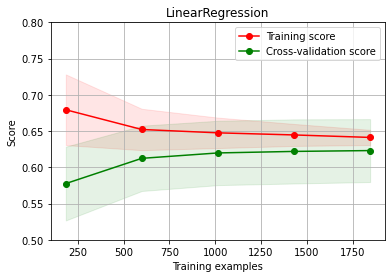

In [20]:
X = train_data.values
y = train_target.values
 
# 图一
title = r"LinearRegression"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LinearRegression()    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 0.8), cv=cv, n_jobs=1)

In [21]:
clf = KNeighborsRegressor(n_neighbors=8) # 最近三个
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("KNeighborsRegressor:   ", score)

KNeighborsRegressor:    0.2730478217182093


[0.61866467 0.68881042 0.71513483 0.73067029 0.74057509]
[0.50676792 0.59053557 0.62087263 0.64017566 0.65590117]


<module 'matplotlib.pyplot' from '/Users/sparklingdeng/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

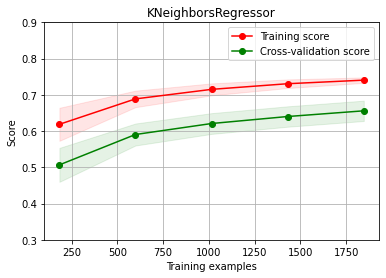

In [22]:
X = train_data.values
y = train_target.values
 
# K近邻回归
title = r"KNeighborsRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = KNeighborsRegressor(n_neighbors=8)    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.3, 0.9), cv=cv, n_jobs=1)

In [23]:
clf = DecisionTreeRegressor() 
clf.fit(train_data, train_target)

score = mean_squared_error(test_target, clf.predict(test_data))
print("DecisionTreeRegressor:   ", score)

DecisionTreeRegressor:    0.6158805276816608


[1. 1. 1. 1. 1.]
[0.13288561 0.23407066 0.28887309 0.31380785 0.33184322]


<module 'matplotlib.pyplot' from '/Users/sparklingdeng/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

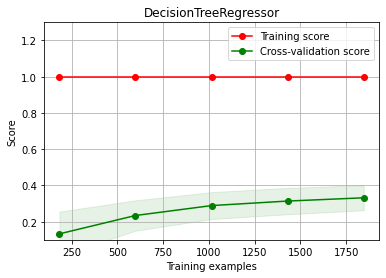

In [24]:
X = train_data.values
y = train_target.values
 
# 决策树回归
title = r"DecisionTreeRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeRegressor()    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.3), cv=cv, n_jobs=1)

In [25]:
clf = RandomForestRegressor(n_estimators=200) # 200棵树模型
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor:   ", score)

RandomForestRegressor:    0.24558895723875426


[0.93716961 0.94838888 0.95207409 0.95435666 0.95574807]
[0.54672024 0.61979204 0.64640028 0.66067952 0.67396211]


<module 'matplotlib.pyplot' from '/Users/sparklingdeng/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

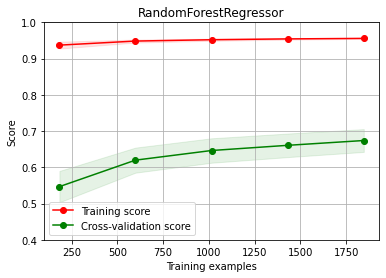

In [26]:
X = train_data.values
y = train_target.values
 
# K近邻回归
title = r"RandomForestRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor(n_estimators=200)    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.4, 1.0), cv=cv, n_jobs=1)